##**Asssignment1-PART-C -Comparing Classification Models**

In [ ]:
import keras
import numpy as np
from keras.layers import Lambda, GlobalAveragePooling1D, Dense, Embedding
from keras import backend as K
from keras.models import Sequential
import matplotlib.pyplot as plt

### Downloading data

In [ ]:
imdb = keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print("Training entries: {}, labels: {}".format(len(X_train), len(y_train)))

Training entries: 25000, labels: 25000


In [ ]:
 X_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  
word_index["<UNUSED>"] = 3

To reverse key and values in a dictionary:

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
reverse_word_index[25]

'you'

And to recreate the whole sentence from our training data we define decode_review:


In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(X_train[10])

"<START> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and <UNK> romance <UNK> on to the scene <UNK> <UNK> the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made <UNK> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <UNK> by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <UNK> sent to prison for fraud he is put in a cell with three others the quietly insane <UNK> body building <UNK> marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old <UNK> after <UNK> part of it they soon realise its magical powers and realise they may be able to use it

### Creating One-hot word vectors

In [ ]:
def OneHot(input_dim=None, input_length=None):
    
    if input_dim is None or input_length is None:
        raise TypeError("input_dim or input_length is not set")

    
    def _one_hot(x, num_classes):
        return K.one_hot(K.cast(x, 'uint8'),
                          num_classes=num_classes)

    return Lambda(_one_hot,
                  arguments={'num_classes': input_dim},
                  input_shape=(input_length,))

### Preparing input data

In [ ]:
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 256

#padding the train and test data
X_train_enc = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

X_test_enc = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
print(X_train_enc[1])
print('\nLength: ',len(X_train_enc))

[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

In [ ]:
class GlobalAveragePooling1DMasked(GlobalAveragePooling1D):
    def call(self, x, mask=None):
        if mask != None:
            return K.sum(x, axis=1) / K.sum(mask, axis=1)
        else:
            return super().call(x)


# **Model 1: Neural averaging network using one-hot vectors**

In [ ]:
# your code goes here

#sequential library is used to add layer one by one
model = Sequential()
#first layer --> onehot encoding layer
model.add(OneHot(VOCAB_SIZE, MAX_SEQUENCE_LENGTH))
#second layer --> globalpooling layer
model.add(GlobalAveragePooling1DMasked())
#third layer --> dense layer which is otherwise known as output layer
model.add(Dense(1, activation='sigmoid', name="output_layer"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 256, 10000)        0         
_________________________________________________________________
global_average_pooling1d_mas (None, 10000)             0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 10001     
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [ ]:
# your code goes here

#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#creating the validation set
X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

y_val = np.array(y_train[:10000])
partial_y_train = np.array(y_train[10000:])

In [ ]:
#Training to monitor the model loss and accuracy on validation set
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 4s 116ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 0.6928 - val_accuracy: 0.5364
Epoch 2/40
30/30 [==============================] - 3s 104ms/step - loss: 0.6926 - accuracy: 0.5555 - val_loss: 0.6924 - val_accuracy: 0.5553
Epoch 3/40
30/30 [==============================] - 3s 104ms/step - loss: 0.6922 - accuracy: 0.5706 - val_loss: 0.6920 - val_accuracy: 0.5764
Epoch 4/40
30/30 [==============================] - 3s 104ms/step - loss: 0.6918 - accuracy: 0.5793 - val_loss: 0.6917 - val_accuracy: 0.5678
Epoch 5/40
30/30 [==============================] - 3s 104ms/step - loss: 0.6914 - accuracy: 0.5942 - val_loss: 0.6913 - val_accuracy: 0.6127
Epoch 6/40
30/30 [==============================] - 3s 104ms/step - loss: 0.6910 - accuracy: 0.6084 - val_loss: 0.6909 - val_accuracy: 0.5940
Epoch 7/40
30/30 [==============================] - 3s 104ms/step - loss: 0.6906 - accuracy: 0.6201 - val_loss: 0.6905 - val_accuracy: 0.6248
Epoch 

### Evaluating the model

To evaulate the model on test data:

In [ ]:
#evaluate on the test data
results = model.evaluate(X_test_enc, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.6787 - accuracy: 0.6761


In [ ]:
print(results)
#loss, accuracy 

[0.6786719560623169, 0.6760799884796143]


Our first model accuracy using one-hot vectors is ~68%







### Plotting the accuracy graph

In [ ]:
pip install plot_keras_history

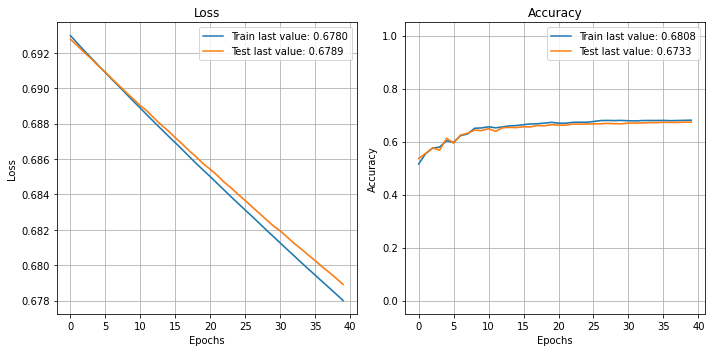

In [ ]:
# your code goes here
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

#plotting
plot_history(history.history, path="standard.png")
plt.show()


# **Model 2: Neural averaging network using embedding layer**

In [ ]:
# your code goes here

#sequential library is used to add layer one by one
model2 = Sequential()
#first layer --> embedding layer
model2.add(Embedding(VOCAB_SIZE, MAX_SEQUENCE_LENGTH))
#second layer --> globalpooling layer
model2.add(GlobalAveragePooling1DMasked())
#third layer --> output layer
model2.add(Dense(1, activation='sigmoid', name="output_layer"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         2560000   
_________________________________________________________________
global_average_pooling1d_mas (None, 256)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 257       
Total params: 2,560,257
Trainable params: 2,560,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Training to monitor the model loss and accuracy on validation set
history2 = model2.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 3s 84ms/step - loss: 0.6906 - accuracy: 0.5406 - val_loss: 0.6804 - val_accuracy: 0.6954
Epoch 2/40
30/30 [==============================] - 2s 78ms/step - loss: 0.6741 - accuracy: 0.7213 - val_loss: 0.6570 - val_accuracy: 0.7305
Epoch 3/40
30/30 [==============================] - 2s 78ms/step - loss: 0.6444 - accuracy: 0.7470 - val_loss: 0.6224 - val_accuracy: 0.7484
Epoch 4/40
30/30 [==============================] - 2s 78ms/step - loss: 0.6053 - accuracy: 0.7665 - val_loss: 0.5830 - val_accuracy: 0.7649
Epoch 5/40
30/30 [==============================] - 2s 78ms/step - loss: 0.5606 - accuracy: 0.7875 - val_loss: 0.5396 - val_accuracy: 0.7935
Epoch 6/40
30/30 [==============================] - 2s 78ms/step - loss: 0.5115 - accuracy: 0.8175 - val_loss: 0.4988 - val_accuracy: 0.8137
Epoch 7/40
30/30 [==============================] - 2s 77ms/step - loss: 0.4692 - accuracy: 0.8365 - val_loss: 0.4636 - val_accuracy: 0.8301
Epoch 8/40
30

In [ ]:
#evaluate on the test data
results = model2.evaluate(X_test_enc, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3107 - accuracy: 0.8737


In [ ]:
#loss, accuracy
print (results)

[0.3106572926044464, 0.8737199902534485]


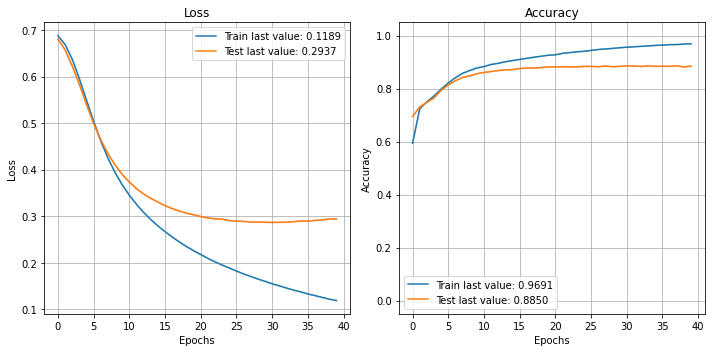

In [ ]:
#plotting
plot_history(history2.history, path="standard.png")
plt.show()

The accuracy of model2 is 87%. Using Embedding layer instead of one-hot layer improved the performance.

# **Model 3: Using pre-trained word embeddings**

### Preparing pre-trained word embeddings (GLOVE)

In [ ]:
def readGloveFile(gloveFile):
    with open(gloveFile, 'r') as f:
        wordToGlove = {}  
        wordToIndex = {}  
        indexToWord = {}  

        for line in f:
            record = line.strip().split()
            token = record[0] 
            wordToGlove[token] = np.array(record[1:], dtype=np.float64) 
            
        tokens = sorted(wordToGlove.keys())
        for idx, tok in enumerate(tokens):
            kerasIdx = idx + 1  
            wordToIndex[tok] = kerasIdx 
            indexToWord[kerasIdx] = tok 

    return wordToIndex, indexToWord, wordToGlove

Now, we create our pre-trained Embedding layer:

In [ ]:
from keras.initializers import Constant

def createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable):
    vocabLen = len(wordToIndex) + 1  
    embDim = next(iter(wordToGlove.values())).shape[0]  
   
    embeddingMatrix = np.zeros((vocabLen, embDim))  
    for word, index in wordToIndex.items():
        embeddingMatrix[index, :] = wordToGlove[word] 

    embeddingLayer = Embedding(vocabLen, embDim, embeddings_initializer=Constant(embeddingMatrix), trainable=isTrainable, name='GloVe_Embeddings')
    return embeddingLayer

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip /content/glove.6B.zip

--2021-03-01 21:56:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-01 21:56:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-01 21:56:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

We freeze the weights. To create the model: 

In [ ]:
#wordToIndex,indexToWord,wordToGlove=readGloveFile('/content/glove.6B.50d.txt')
#wordToIndex,indexToWord,wordToGlove=readGloveFile('/content/glove.6B.100d.txt')
wordToIndex,indexToWord,wordToGlove=readGloveFile('/content/glove.6B.300d.txt')

#vocabLen = len(wordToIndex) + 1 

EMBED_SIZE = next(iter(wordToGlove.values())).shape[0]
print('Size of Embedding: ',EMBED_SIZE)

embeddingLayer=createPretrainedEmbeddingLayer(wordToGlove,wordToIndex,isTrainable=False)

Size of Embedding:  300


## **Model 3-1: Neural bag of words using pre-trained word embeddings**

In [ ]:
#Now we change our model to use GloVe
# Inspect model performance with 1 hidden layer, pre-trained embeddings
# your code goes here
hidden_layer= 16

#sequential library is used to add layer one by one
model3a = Sequential()
#first layer --> pre-trained embedding layer
model3a.add(createPretrainedEmbeddingLayer(wordToGlove,wordToIndex,isTrainable=False))
#second layer --> globalpooling layer
model3a.add(GlobalAveragePooling1DMasked())
#third layer --> dense layer with 16 hidden layer
model3a.add(Dense(hidden_layer, activation='sigmoid', name="hidden_layer"))
#fourth layer --> output layer
model3a.add(Dense(1, activation='sigmoid'))

model3a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Embeddings (Embedding) (None, None, 300)         120000300 
_________________________________________________________________
global_average_pooling1d_mas (None, 300)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                4816      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 120,005,133
Trainable params: 4,833
Non-trainable params: 120,000,300
_________________________________________________________________


In [ ]:
#Train and test the model
#compile the model
model3a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Training to monitor the model loss and accuracy on validation set
history3a = model3a.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 44ms/step - loss: 0.6961 - accuracy: 0.5038 - val_loss: 0.6914 - val_accuracy: 0.5246
Epoch 2/40
30/30 [==============================] - 1s 41ms/step - loss: 0.6894 - accuracy: 0.5345 - val_loss: 0.6865 - val_accuracy: 0.5622
Epoch 3/40
30/30 [==============================] - 1s 41ms/step - loss: 0.6851 - accuracy: 0.5712 - val_loss: 0.6844 - val_accuracy: 0.5490
Epoch 4/40
30/30 [==============================] - 1s 41ms/step - loss: 0.6817 - accuracy: 0.5623 - val_loss: 0.6805 - val_accuracy: 0.5811
Epoch 5/40
30/30 [==============================] - 1s 41ms/step - loss: 0.6783 - accuracy: 0.5929 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 6/40
30/30 [==============================] - 1s 41ms/step - loss: 0.6764 - accuracy: 0.5960 - val_loss: 0.6753 - val_accuracy: 0.5961
Epoch 7/40
30/30 [==============================] - 1s 41ms/step - loss: 0.6744 - accuracy: 0.5910 - val_loss: 0.6730 - val_accuracy: 0.5948
Epoch 8/40
30

In [ ]:
#evaluate on test data
results = model3a.evaluate(X_test_enc, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6095 - accuracy: 0.6797


In [ ]:
#loss, accuracy
print(results)

[0.6094802618026733, 0.6796799898147583]


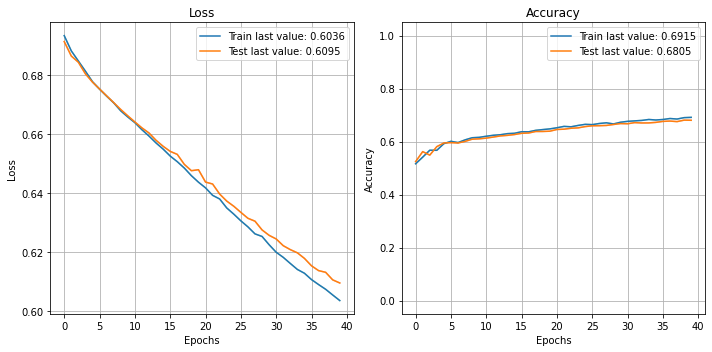

In [ ]:
#plot
plot_history(history3a.history, path="standard.png")
plt.show()

#**fine-tune the weights in pretrained layer**

In [ ]:
# your code goes here
#To compare freezing and fine-tuning the pre-train embedding weights, we fine-tune the weights here
#so that, in pretrained layer train data is changed to true
hidden_layer= 16

#sequential library is used to add layer one by one
model3b = Sequential()
#first layer --> pre-trained embedding layer
model3b.add(createPretrainedEmbeddingLayer(wordToGlove,wordToIndex,isTrainable=True))
#second layer --> globalpooling layer
model3b.add(GlobalAveragePooling1DMasked())
#third layer --> dense layer with hidden layer
model3b.add(Dense(hidden_layer, activation='sigmoid', name="hidden_layer"))
#fourth layer --> output layer
model3b.add(Dense(1, activation='sigmoid', name="output_layer"))

model3b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Embeddings (Embedding) (None, None, 300)         120000300 
_________________________________________________________________
global_average_pooling1d_mas (None, 300)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                4816      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 120,005,133
Trainable params: 120,005,133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train and test the model
#compiling the model
model3b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Training to monitor the model loss and accuracy on validation set
history3b = model3b.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 21s 651ms/step - loss: 0.6912 - accuracy: 0.5347 - val_loss: 0.6846 - val_accuracy: 0.6095
Epoch 2/40
30/30 [==============================] - 19s 622ms/step - loss: 0.6808 - accuracy: 0.6286 - val_loss: 0.6712 - val_accuracy: 0.6362
Epoch 3/40
30/30 [==============================] - 19s 618ms/step - loss: 0.6640 - accuracy: 0.6554 - val_loss: 0.6471 - val_accuracy: 0.6656
Epoch 4/40
30/30 [==============================] - 18s 616ms/step - loss: 0.6349 - accuracy: 0.6902 - val_loss: 0.6113 - val_accuracy: 0.7084
Epoch 5/40
30/30 [==============================] - 19s 619ms/step - loss: 0.5957 - accuracy: 0.7294 - val_loss: 0.5670 - val_accuracy: 0.7557
Epoch 6/40
30/30 [==============================] - 19s 620ms/step - loss: 0.5447 - accuracy: 0.7736 - val_loss: 0.5156 - val_accuracy: 0.7924
Epoch 7/40
30/30 [==============================] - 18s 616ms/step - loss: 0.4878 - accuracy: 0.8130 - val_loss: 0.4662 - val_accuracy: 0.8198

In [ ]:
#evaluate on test data
results = model3b.evaluate(X_test_enc, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3798 - accuracy: 0.8650


In [ ]:
#loss, accuracy
print(results)

[0.37979957461357117, 0.8649600148200989]


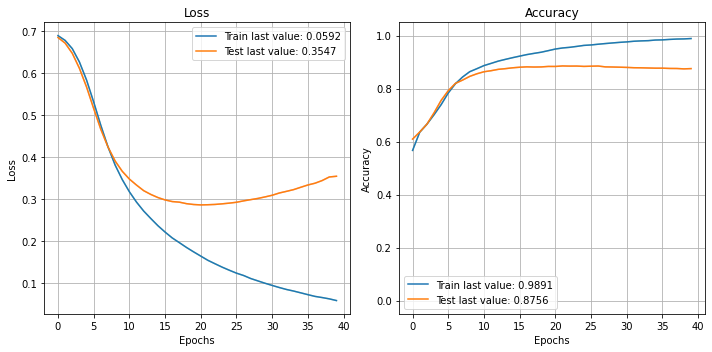

In [ ]:
#plot
plot_history(history3b.history, path="standard.png")
plt.show()

• fine-tuning the pre-trained embeddings would obtain better accuracy.

##  **Model 3-2: LSTM with pre-trained word embeddings**

In [ ]:
#replace the embeddings with the GloVe pre-trained embeddings with LSTM
# your code goes here
from keras.layers import LSTM
LSTM_units=100
hidden_layer = 16

#sequential library is used to add layer one by one
model3c = Sequential()
#first layer --> pre-trained embedding layer
model3c.add(createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable=False))
#second layer --> LSTM layer
model3c.add(LSTM((LSTM_units), return_sequences=False))
#third layer --> dense layer
model3c.add(Dense(1, activation='sigmoid', name="output_layer"))

model3c.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Embeddings (Embedding) (None, None, 300)         120000300 
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 120,160,801
Trainable params: 160,501
Non-trainable params: 120,000,300
_________________________________________________________________


In [ ]:
# Train and test the model
#compiling the data
model3c.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#training on validation data
history3c = model3c.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 9s 103ms/step - loss: 0.6915 - accuracy: 0.5167 - val_loss: 0.6795 - val_accuracy: 0.5373
Epoch 2/40
30/30 [==============================] - 3s 91ms/step - loss: 0.6724 - accuracy: 0.5762 - val_loss: 0.6849 - val_accuracy: 0.5342
Epoch 3/40
30/30 [==============================] - 3s 92ms/step - loss: 0.6785 - accuracy: 0.5403 - val_loss: 0.6810 - val_accuracy: 0.5298
Epoch 4/40
30/30 [==============================] - 3s 91ms/step - loss: 0.6700 - accuracy: 0.5542 - val_loss: 0.6638 - val_accuracy: 0.5895
Epoch 5/40
30/30 [==============================] - 3s 92ms/step - loss: 0.6507 - accuracy: 0.6213 - val_loss: 0.6823 - val_accuracy: 0.5249
Epoch 6/40
30/30 [==============================] - 3s 91ms/step - loss: 0.6720 - accuracy: 0.5393 - val_loss: 0.6776 - val_accuracy: 0.5426
Epoch 7/40
30/30 [==============================] - 3s 91ms/step - loss: 0.6636 - accuracy: 0.5683 - val_loss: 0.6735 - val_accuracy: 0.5477
Epoch 8/40
3

In [ ]:
#evaluate on test data
results = model3c.evaluate(X_test_enc, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.6727 - accuracy: 0.5531


In [ ]:
#loss, accuracy
print(results)

[0.6727245450019836, 0.5530800223350525]


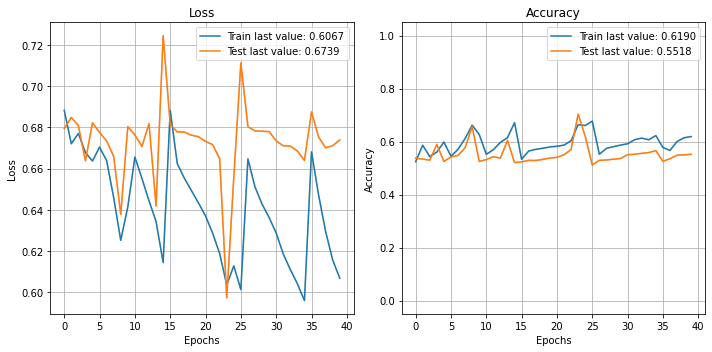

In [ ]:
#plot
plot_history(history3c.history, path="standard.png")
plt.show()

Experiment show that simply replacing the lab 2 model embeddings with pre-trained word embeddings (GloVe) will cause performance to drop significantly. 
What can you do to improve the situation?

**ANSWER:**
* By adding a bidirectional LSTM (or) extra hidden layer we can improve this situation.

#  **Model 4: Adding extra dense layer into Neural averaging network model**

### **Adding one extra dense layer**

In [ ]:
# Inspect model performance with 1 hidden layer, pre-trained embeddings
# your code goes here
hidden_layer=16

#sequential library is used to add layer one by one
model4a = Sequential()
#first layer --> pre-trained embedding layer
model4a.add(createPretrainedEmbeddingLayer(wordToGlove,wordToIndex,isTrainable=False))
#second layer --> globalpooling layer
model4a.add(GlobalAveragePooling1DMasked())
#third layer --> dense layer with 1 hidden layer
model4a.add(Dense(hidden_layer, activation='sigmoid', name="hidden_layer"))
#fourth layer --> first dense layer
model4a.add(Dense(4, activation='relu', name="first_dense_layer"))
#fifth layer --> output layer
model4a.add(Dense(1, activation='sigmoid', name="output_layer"))

model4a.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Embeddings (Embedding) (None, None, 300)         120000300 
_________________________________________________________________
global_average_pooling1d_mas (None, 300)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                4816      
_________________________________________________________________
first_dense_layer (Dense)    (None, 4)                 68        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 120,005,189
Trainable params: 4,889
Non-trainable params: 120,000,300
_________________________________________________________________


In [ ]:
#compile
model4a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#training
history4a = model4a.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 49ms/step - loss: 0.7353 - accuracy: 0.4931 - val_loss: 0.6941 - val_accuracy: 0.4975
Epoch 2/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6939 - accuracy: 0.5018 - val_loss: 0.6928 - val_accuracy: 0.5059
Epoch 3/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6926 - accuracy: 0.5072 - val_loss: 0.6907 - val_accuracy: 0.5162
Epoch 4/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6906 - accuracy: 0.5146 - val_loss: 0.6888 - val_accuracy: 0.5378
Epoch 5/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6881 - accuracy: 0.5454 - val_loss: 0.6870 - val_accuracy: 0.5552
Epoch 6/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6858 - accuracy: 0.5672 - val_loss: 0.6853 - val_accuracy: 0.5631
Epoch 7/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6836 - accuracy: 0.5801 - val_loss: 0.6781 - val_accuracy: 0.5767
Epoch 8/40
30

In [ ]:
#testing
results = model4a.evaluate(X_test_enc, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5774 - accuracy: 0.7011


In [ ]:
#loss, acccuracy
print(results)

[0.5773522257804871, 0.7011200189590454]


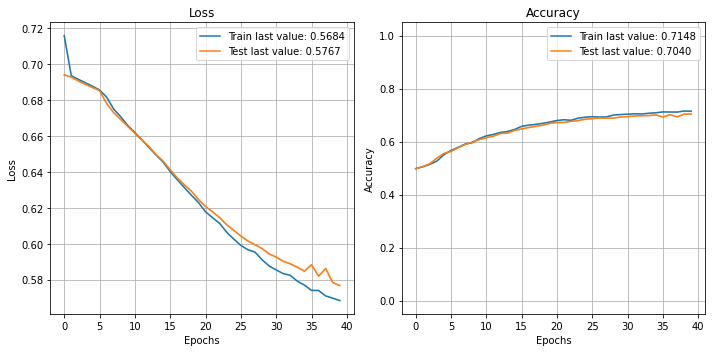

In [ ]:
#plot
plot_history(history4a.history, path="standard.png")
plt.show()

### **Adding two extra dense layers**

In [ ]:
# Inspect model performance with 1 hidden layer, pre-trained embeddings
# your code goes here
hidden_layer=16

#sequential library is used to add layer one by one
model4b = Sequential()
#first layer --> pre-trained embedding layer
model4b.add(createPretrainedEmbeddingLayer(wordToGlove,wordToIndex,isTrainable=False))
#second layer --> globalpooling layer
model4b.add(GlobalAveragePooling1DMasked())
#third layer --> layer with hidden layer
model4b.add(Dense(hidden_layer, activation='sigmoid', name="hidden_layer"))
#fourth layer --> first dense layer
model4b.add(Dense(2, activation='relu', name="first_dense_layer"))
#fifth layer --> second dense layer
model4b.add(Dense(4, activation='softmax', name="second_dense_layer"))
#sixth layer --> output layer
model4b.add(Dense(1, activation='sigmoid', name="output_layer"))

model4b.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Embeddings (Embedding) (None, None, 300)         120000300 
_________________________________________________________________
global_average_pooling1d_mas (None, 300)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                4816      
_________________________________________________________________
first_dense_layer (Dense)    (None, 2)                 34        
_________________________________________________________________
second_dense_layer (Dense)   (None, 4)                 12        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 120,005,167
Trainable params: 4,867
Non-trainable params: 120,000,300
____________________________________

In [ ]:
#compile
model4b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#training
history4b = model4b.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 49ms/step - loss: 0.7205 - accuracy: 0.4968 - val_loss: 0.7108 - val_accuracy: 0.5053
Epoch 2/40
30/30 [==============================] - 1s 45ms/step - loss: 0.7131 - accuracy: 0.4956 - val_loss: 0.7056 - val_accuracy: 0.5053
Epoch 3/40
30/30 [==============================] - 1s 45ms/step - loss: 0.7071 - accuracy: 0.4973 - val_loss: 0.7016 - val_accuracy: 0.5053
Epoch 4/40
30/30 [==============================] - 1s 45ms/step - loss: 0.7037 - accuracy: 0.4948 - val_loss: 0.6987 - val_accuracy: 0.5053
Epoch 5/40
30/30 [==============================] - 1s 45ms/step - loss: 0.7012 - accuracy: 0.4915 - val_loss: 0.6966 - val_accuracy: 0.5053
Epoch 6/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6975 - accuracy: 0.4982 - val_loss: 0.6952 - val_accuracy: 0.5053
Epoch 7/40
30/30 [==============================] - 1s 45ms/step - loss: 0.6957 - accuracy: 0.4997 - val_loss: 0.6943 - val_accuracy: 0.5053
Epoch 8/40
30

In [ ]:
#testing
results = model4b.evaluate(X_test_enc, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6130 - accuracy: 0.6824


In [ ]:
#loss, accuracy
print(results)

[0.6130428910255432, 0.6823999881744385]


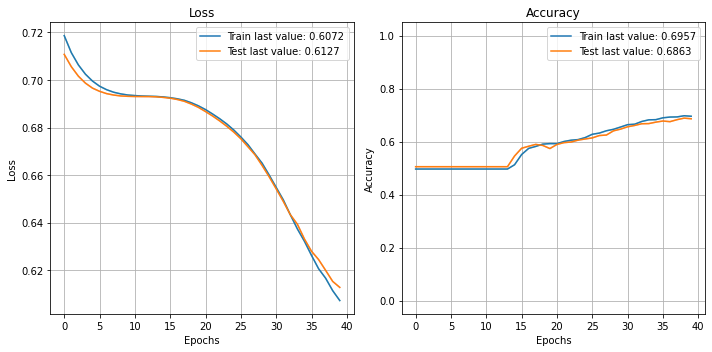

In [ ]:
#plotting
plot_history(history4b.history, path="standard.png")
plt.show()

These two experiments show that adding extra dense layers can slightly improve accuracy over model 3-1.

**INFERENCE:**
* Improvements can be done by adding a convolution layer (or) the dropout layer. So that, the accuracy can be increased.



#  **Model 5: CNN for Text Classification**

##  **Model 5-1: Basic CNN model for Text Classification** 

In [ ]:
#start by using one CNN layer and then adding another layer
#You could use embeddings from pre-trained or scratch.
from keras.layers import Conv1D

hidden_layer=16

# your code goes here

#sequential library is used to add layer one by one
model5a = Sequential()
#first layer --> pretrained embedding layer
model5a.add(createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable=False))
#second layer --> first convolutional layer
model5a.add(Conv1D(128, kernel_size= 8, activation="relu", strides=3, name="convolutional_layer1"))
#third layer --> pooling layer 
model5a.add(GlobalAveragePooling1DMasked())
#fourth layer --> dense layer with 16 hidden layers 
model5a.add(Dense(hidden_layer, activation='sigmoid', name="hidden_layer"))
#fifth layer --> dense layer
model5a.add(Dense(1, activation='sigmoid', name="output_layer"))

model5a.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Embeddings (Embedding) (None, None, 300)         120000300 
_________________________________________________________________
convolutional_layer1 (Conv1D (None, None, 128)         230528    
_________________________________________________________________
global_average_pooling1d_mas (None, 128)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                2064      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 120,232,909
Trainable params: 232,609
Non-trainable params: 120,000,300
_________________________________________________________________


In [ ]:
# Train and test the model
# your code goes here
#compiling the model
model5a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#training
history5a = model5a.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 3s 60ms/step - loss: 0.7058 - accuracy: 0.5110 - val_loss: 0.6894 - val_accuracy: 0.5465
Epoch 2/40
30/30 [==============================] - 2s 54ms/step - loss: 0.6854 - accuracy: 0.5631 - val_loss: 0.6749 - val_accuracy: 0.5871
Epoch 3/40
30/30 [==============================] - 2s 54ms/step - loss: 0.6690 - accuracy: 0.6077 - val_loss: 0.6613 - val_accuracy: 0.6160
Epoch 4/40
30/30 [==============================] - 2s 54ms/step - loss: 0.6548 - accuracy: 0.6410 - val_loss: 0.6495 - val_accuracy: 0.6317
Epoch 5/40
30/30 [==============================] - 2s 54ms/step - loss: 0.6414 - accuracy: 0.6507 - val_loss: 0.6316 - val_accuracy: 0.6698
Epoch 6/40
30/30 [==============================] - 2s 54ms/step - loss: 0.6202 - accuracy: 0.6883 - val_loss: 0.6254 - val_accuracy: 0.6601
Epoch 7/40
30/30 [==============================] - 2s 55ms/step - loss: 0.6115 - accuracy: 0.6804 - val_loss: 0.6037 - val_accuracy: 0.6869
Epoch 8/40
30

In [ ]:
#testing
results = model5a.evaluate(X_test_enc, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4888 - accuracy: 0.7686


In [ ]:
#loss, accuracy
print(results)

[0.488802433013916, 0.7685999870300293]


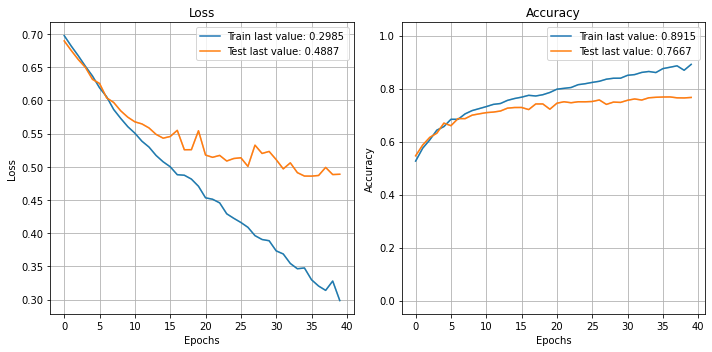

In [ ]:
# your code goes here
#plot
plot_history(history5a.history, path="standard.png")
plt.show()

## **Model 5-2: Adding extra convolutional layer**

In [ ]:
# your code goes here

#sequential library is used to add layer one by one
model5b = Sequential()
#first layer --> pretrained embedding layer
model5b.add(createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable=False))
#second layer --> first convolutional layer
model5b.add(Conv1D(128, kernel_size= 8, activation="relu", strides=3, name="convolutional_layer1"))
#third layer -->  extra convolutional layer
model5b.add(Conv1D(128, kernel_size= 8, activation="softmax", strides=3, name="convolutional_layer2"))
#fourth layer --> pooling layer 
model5b.add(GlobalAveragePooling1DMasked())
#fifth layer --> dense layer with 16 hidden layers 
model5b.add(Dense(hidden_layer, activation='sigmoid', name="hidden_layer"))
#sixth layer --> dense layer
model5b.add(Dense(1, activation='sigmoid', name="output_layer"))

model5b.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
GloVe_Embeddings (Embedding) (None, None, 300)         120000300 
_________________________________________________________________
convolutional_layer1 (Conv1D (None, None, 128)         230528    
_________________________________________________________________
convolutional_layer2 (Conv1D (None, None, 128)         98432     
_________________________________________________________________
global_average_pooling1d_mas (None, 128)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                2064      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 120,331,341
Trainable params: 331,041
Non-trainable params: 120,000,300
__________________________________

In [ ]:
# Train and test the model
# your code goes here
model5b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#training
history5b = model5b.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 4s 63ms/step - loss: 0.7011 - accuracy: 0.4940 - val_loss: 0.6930 - val_accuracy: 0.4998
Epoch 2/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.5085
Epoch 3/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6929 - accuracy: 0.5162 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 4/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6930 - accuracy: 0.5074 - val_loss: 0.6931 - val_accuracy: 0.5018
Epoch 5/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6931 - accuracy: 0.4971 - val_loss: 0.6934 - val_accuracy: 0.5076
Epoch 6/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6930 - accuracy: 0.5187 - val_loss: 0.6931 - val_accuracy: 0.5073
Epoch 7/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6929 - accuracy: 0.5071 - val_loss: 0.6930 - val_accuracy: 0.5007
Epoch 8/40
30

In [ ]:
#testing
results = model5b.evaluate(X_test_enc, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.5261 - accuracy: 0.7428


In [ ]:
#printing loss, accuracy
print(results)

[0.5260874629020691, 0.7428399920463562]


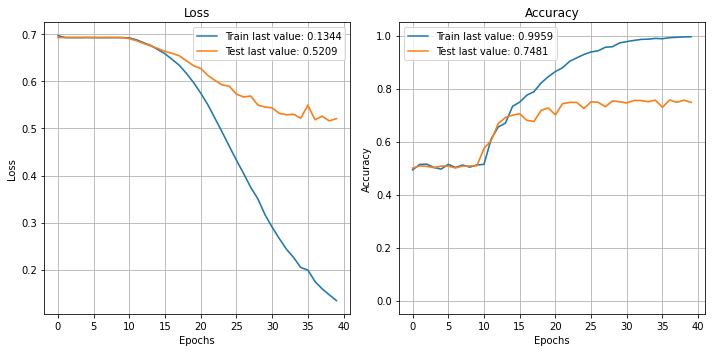

In [ ]:
# your code goes here
#plotting
plot_history(history5b.history, path="standard.png")
plt.show()

*	both the models overfits
* Adding more the one convolutional layer overfits the model much.
* Among the above two models,  One has a single convolutional layer and other has the dual convolutional layer. When comparing these two models, the second model  which has 2 convolution layers Overfits to a larger extent than the first model which has the single convolutional layer.
